In [1]:
# Authors:
# Chang Hi Lee(lee.c@wustl.edu)
# Peter Yan(xiaopeter@wustl.edu)

In [ ]:
import pycaret
import pandas as pd
from pycaret.datasets import get_data
from pycaret.time_series import *

In [2]:
# Read csv, drop extra targets, check if any NA values exist
df = pd.read_csv('AAPL.csv')
df = df.drop(columns=['target1w','target1m'], axis=1)
df = df.rename(columns={"Unnamed: 0" : "Date"})
df = df.drop(columns=['Date'], axis=1)
num_NA = df.isna().sum().sum()
print(df.columns)
print(f'Number of NA values in Data: {num_NA}')

Index(['open', 'high', 'low', 'close', 'volume', 'SMA', 'EMA', 'WMA', 'DEMA',
       'TEMA', 'TRIMA', 'KAMA', 'T3', 'FAMA', 'MAMA', 'MACD', 'MACD_Hist',
       'MACD_Signal', 'SlowD', 'SlowK', 'FastD', 'FastK', 'FastD.1', 'FastK.1',
       'RSI', 'CMO', 'APO', 'WILLR', 'ADX', 'ADXR', 'CCI', 'Aroon Down',
       'Aroon Up', 'AROONOSC', 'MFI', 'DX', 'MINUS_DI', 'PLUS_DI', 'MINUS_DM',
       'PLUS_DM', 'ULTOSC', 'MOM', 'ROC', 'ROCR', 'TRIX', 'BOP', 'TRANGE',
       'SAR', 'ATR', 'NATR', 'Chaikin A/D', 'ADOSC', 'OBV', 'target1d'],
      dtype='object')
Number of NA values in Data: 0


In [3]:
print(df)

        open    high     low   close     volume       SMA       EMA       WMA  \
0     115.19  115.50  113.12  114.87    2584800    0.8668    0.8618    0.8729   
1     114.62  115.37  110.87  111.25    2084300    0.8693    0.8595    0.8697   
2     110.12  116.94  106.69  113.81    3770500    0.8691    0.8612    0.8696   
3     113.23  119.00  111.00  116.25    4224100    0.8702    0.8659    0.8729   
4     117.31  119.12  111.75  115.20    3361000    0.8721    0.8684    0.8746   
...      ...     ...     ...     ...        ...       ...       ...       ...   
5586  156.71  158.23  153.27  157.96  123055265  161.5977  161.1401  159.8942   
5587  158.15  160.71  156.32  159.48   88966526  160.8068  160.7960  159.4668   
5588  159.67  166.48  159.26  166.02  107521649  160.6860  161.7017  160.3706   
5589  163.85  164.08  154.95  156.77  130525275  159.7224  160.7634  159.6169   
5590  156.01  159.44  154.18  157.28  116124647  159.2951  160.1301  159.1729   

          DEMA      TEMA  .

In [4]:
df_train = df.iloc[:-7]
df_test = df.iloc[-7:]
print(df_train.head(2))
print(df_test.head(2))

     open    high     low   close   volume     SMA     EMA     WMA    DEMA  \
0  115.19  115.50  113.12  114.87  2584800  0.8668  0.8618  0.8729  0.8848   
1  114.62  115.37  110.87  111.25  2084300  0.8693  0.8595  0.8697  0.8765   

     TEMA  ...    TRIX     BOP  TRANGE     SAR     ATR    NATR   Chaikin A/D  \
0  0.8881  ...  0.5409 -0.1345  0.0182  0.7089  0.0455  5.1907 -6.854993e+08   
1  0.8742  ...  0.5241 -0.7489  0.0343  0.7111  0.0444  5.2282 -8.795154e+08   

          ADOSC         OBV  target1d  
0  3.060632e+08  7882579074 -0.006529  
1  2.185535e+08  7649137241  0.032539  

[2 rows x 54 columns]
        open     high     low   close     volume       SMA       EMA  \
5584  159.25  164.515  158.93  163.64  130216792  163.0705  162.8933   
5585  161.84  166.200  157.25  157.65  131747571  162.3076  161.8981   

           WMA      DEMA      TEMA  ...    TRIX     BOP  TRANGE       SAR  \
5584  161.7540  159.7844  158.8435  ... -0.2856  0.7860  7.9334  172.8953   
5585  160.

In [5]:
# Set up pycaret timeseries pipeline
# https://pycaret.readthedocs.io/en/time_series/api/time_series.html
exp = setup(data=df_train, target='target1d', fold_strategy='rolling', fold=3, fh=7, seasonal_period='D', enforce_exogenous=True, n_jobs=-1, session_id=1, fig_kwargs={"height": 750, 'width': 1500})

,Description,Value
0,session_id,1
1,Target,target1d
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(5584, 54)"
5,Train data shape,"(5577, 54)"
6,Test data shape,"(7, 54)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [6]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.0155,0.0203,2.4172,1.0008,0.5475,0.1525,-2.3352,31.6667
arima,ARIMA,0.0156,0.0203,2.4157,1.0016,0.5484,0.1526,-2.3459,7.6200
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.0117,0.0129,1.2803,1.1931,0.4119,0.0971,0.1122,1.4567
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0186,0.0213,2.6497,1.3356,0.6565,0.1599,-2.6560,1.4700
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0201,0.0243,2.7831,1.3433,0.7086,0.1828,-3.8182,5.1267
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0390,0.0482,6.6120,1.4390,1.3748,0.3621,-15.8983,0.9133
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0174,0.0211,2.1179,1.5102,0.6152,0.1583,-2.3358,1.9567
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0144,0.0167,1.4548,1.5600,0.5063,0.1255,-1.0397,1.4800
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0145,0.0169,1.0616,1.5948,0.5127,0.1271,-1.2899,3.1167
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & Detrending,0.0631,0.0645,10.7396,1.6091,2.2254,0.4853,-24.2550,1.5567


In [7]:
print(best)

AutoARIMA(random_state=1, suppress_warnings=True)


In [7]:
best_model = create_model('omp_cds_dt')
tuned_best = tune_model(best_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,5555.0000,0.0061,0.0072,0.5560,0.6107,0.2156,0.0541,0.0645
1,5562.0000,0.0150,0.0171,1.3183,1.3693,0.5285,0.1286,-0.0683
2,5569.0000,0.0182,0.0243,2.7709,1.4761,0.6415,0.1827,-1.1304
Mean,nan,0.0131,0.0162,1.5484,1.1521,0.4619,0.1218,-0.3781
SD,nan,0.0051,0.0070,0.9188,0.3853,0.1802,0.0527,0.5348


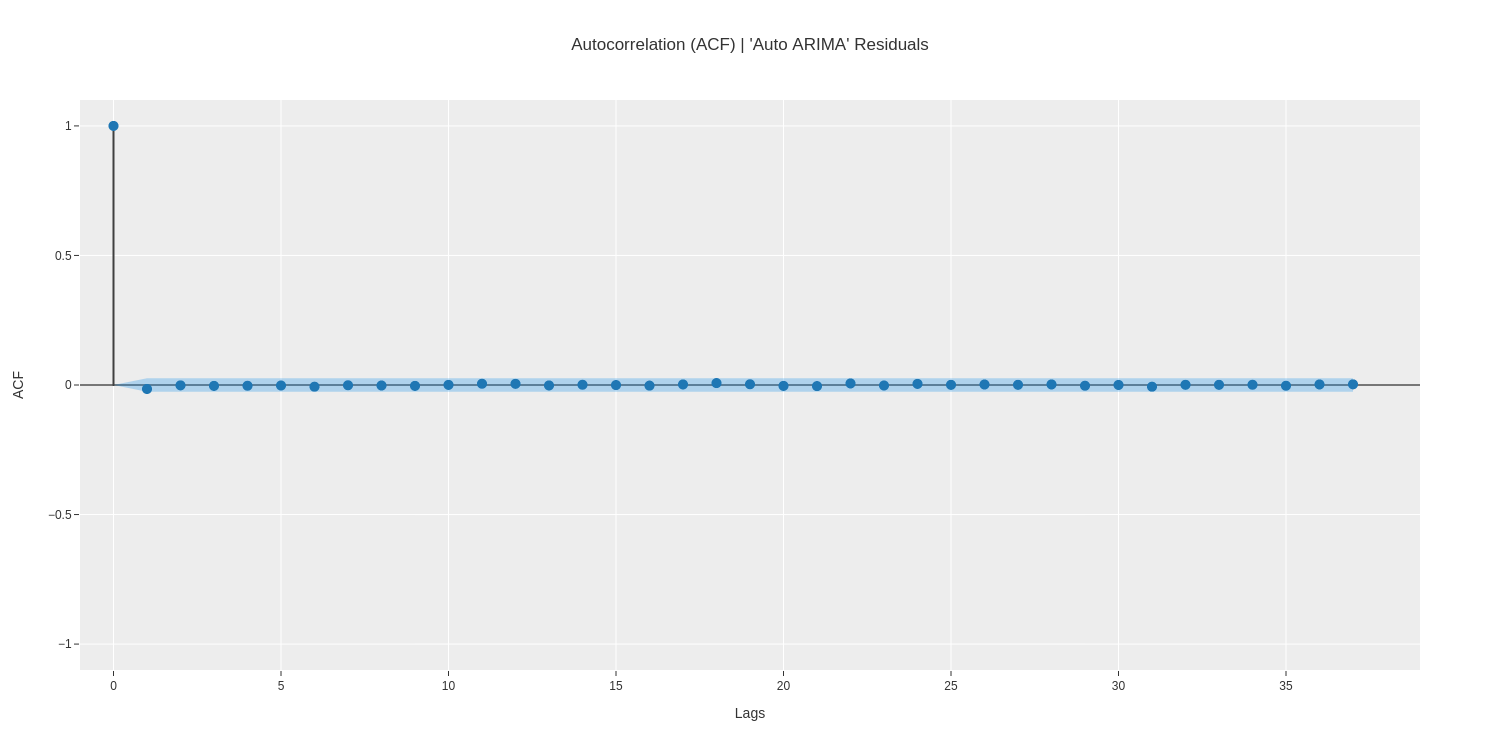

In [22]:
plot_model(best, plot='acf')

In [ ]:
plot_model(tuned_best, plot = 'cv')

In [ ]:
plot_model(tuned_best, plot = 'diagnostics')

In [14]:
df_pred = predict_model(tuned_best)
print(df_pred)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,OrthogonalMatchingPursuit,0.0262,0.0309,6.9597,1.6124,0.9262,0.2322,-2.0715


      y_pred
5577 -0.0190
5578 -0.0233
5579 -0.0141
5580 -0.0170
5581 -0.0195
5582 -0.0152
5583 -0.0215


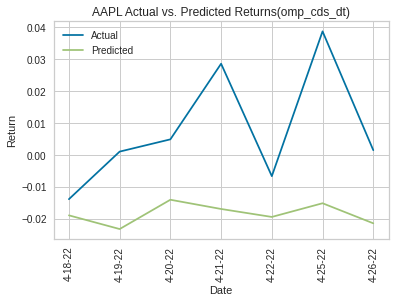

In [15]:
import matplotlib.pyplot as plt
df_actual = df_train['target1d'].iloc[-7:] 
fig, ax = plt.subplots()
ax.plot(df_actual, label='Actual')
ax.plot(df_pred, label='Predicted')
ax.legend()
dates = ['4-18-22', '4-19-22', '4-20-22', '4-21-22', '4-22-22', '4-25-22', '4-26-22']
plt.xticks([5577, 5578, 5579, 5580, 5581, 5582, 5583], dates, rotation='vertical')
plt.title(f'AAPL Actual vs. Predicted Returns(omp_cds_dt)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [11]:
#df_actual.to_csv('actual.csv')
df_pred.to_csv('omp_cds_dt.csv')

In [17]:
import numpy as np
df_actual_np = df_actual.to_numpy().flatten()
df_pred_np = df_pred.to_numpy().flatten()

In [13]:
mae = np.mean(np.abs(df_actual_np - df_pred_np))
mae

0.026247830280716644

In [8]:
tuned_arima = tune_model(best)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,5555.0000,0.0138,0.0195,1.2476,0.7910,0.4873,0.1467,-5.8816
1,5562.0000,0.0162,0.0222,1.4206,0.9525,0.5705,0.1668,-0.7982
2,5569.0000,0.0166,0.0192,4.5832,1.2589,0.5847,0.1441,-0.3259
Mean,nan,0.0155,0.0203,2.4172,1.0008,0.5475,0.1525,-2.3352
SD,nan,0.0012,0.0014,1.5332,0.1941,0.0430,0.0101,2.5150


In [9]:
blender = blend_models([tuned_arima, tuned_best], method='mean')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,5555.0000,0.0070,0.0092,0.6654,0.5224,0.2456,0.0691,-0.5292
1,5562.0000,0.0126,0.0158,1.0843,0.8650,0.4447,0.1190,0.0843
2,5569.0000,0.0164,0.0209,3.3774,1.3572,0.5799,0.1572,-0.5782
Mean,nan,0.0120,0.0153,1.7091,0.9148,0.4234,0.1151,-0.3410
SD,nan,0.0039,0.0048,1.1921,0.3426,0.1373,0.0361,0.3014


In [10]:
df_blended_pred = predict_model(blender)
print(df_blended_pred)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,EnsembleForecaster,0.0123,0.0153,2.6024,1.1771,0.4325,0.1153,0.2433


      y_pred
5577 -0.0294
5578 -0.0109
5579  0.0053
5580  0.0093
5581 -0.0016
5582  0.0098
5583 -0.0031


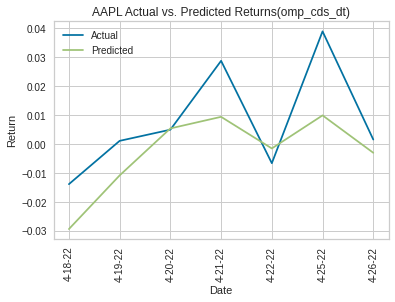

In [19]:
fig, ax = plt.subplots()
ax.plot(df_actual, label='Actual')
ax.plot(df_blended_pred, label='Predicted')
ax.legend()
dates = ['4-18-22', '4-19-22', '4-20-22', '4-21-22', '4-22-22', '4-25-22', '4-26-22']
plt.xticks([5577, 5578, 5579, 5580, 5581, 5582, 5583], dates, rotation='vertical')
plt.title(f'AAPL Actual vs. Predicted Returns(omp_cds_dt)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()
# fig, ax = plt.subplots()
# ax.plot(df['target1d'].iloc[-7:], label='Actual')
# ax.plot(df_blended_pred, label='Predicted')
# ax.legend()
# dates = ['4-27-22', '4-28-22', '4-29-22', '5-2-22', '5-3-22', '5-4-22', '5-5-22']
# plt.xticks([5584, 5585, 5586, 5587, 5588, 5589, 5590], dates, rotation='vertical')
# plt.title('Actual vs. Predicted Returns for AAPL')
# plt.xlabel('Date')
# plt.ylabel('Return')
# plt.show()

In [18]:
import numpy as np
df_blended_pred_np = df_blended_pred.to_numpy().flatten()
mae = np.mean(np.abs(df_actual_np - df_blended_pred_np))
mae

0.012254927355254214

In [21]:
df_blended_pred.to_csv('blended.csv')